# Quel est l'angle optimal de lancer, quand on part d'une hauteur non nulle ?
Les équations horaires en l'absence de frottement sont
$$
x(t)  = v_0t\cos(\alpha)+x_0 \\
y(t)  = -\frac12gt^2 + v_0t\sin(\alpha)+ h
$$
Par choix du repère, on prendra $x_0=0$.

Traçons l'allure de la trajectoire, pour une vitesse initiale $\vec{v_0}$ et une hauteur initiale $h$ donnée.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

g = 10 # m/s^2
v0 = 10 # m/s

def trajectory(t, vertical_position, v0, alpha, g):
    """
    Return the coordinates (x, y) at time t
    """
    # We define the initial x coordinate to be zero
    x0 = 0
    alpha=np.radians(alpha)
        
    x = x0 + v0*np.cos(alpha) * t
    y = -0.5 * g* t**2 + v0*np.sin(alpha) * t + vertical_position
    
    return x, y

def hit_conditions(vertical_position, v0, alpha, g):
    """
    Return (t, L), where t is the time at which the ground is hit, and L 
    is the distance at which the projectile hits the ground
    """
    
    # We define the initial x coordinate to be zero
    x0 = 0
    alpha = np.radians(alpha)
    
    a = -0.5 * g
    b = v0*np.sin(alpha)
    c = vertical_position
    
    # We choose the solution t>0
    tv = (-b - np.sqrt(b**2 - 4 * a * c)) / (2. * a)
    
    L = x0 + v0*np.cos(alpha) * tv
    
    return tv, L


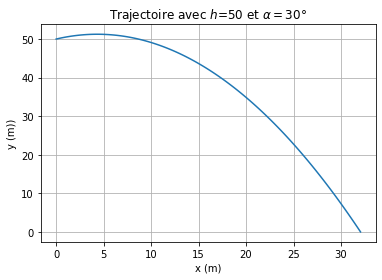

In [44]:
h=50 ; alpha=30 # Exemples de valeur
t_hit, L = hit_conditions(h, v0, alpha ,g)
t_array = np.linspace(0, t_hit, 100)
x_array, y_array = trajectory(t_array, h, v0, alpha, g)

plt.plot(x_array,y_array)
plt.xlabel("x (m)")
plt.ylabel("y (m))")
plt.title("Trajectoire avec $h$={} et $\\alpha=${}°".format(h,alpha))
plt.grid()
plt.show()
   

La distance au sol parcourue est:
$$
L=\frac{v_0^2}{g}\sin(\alpha)\cos(\alpha) + \frac{v_0}{g}\cos(\alpha)\sqrt{v_0^2\sin^2(\alpha)+2gh}
$$
Remarque : si $h=0$, on obtient $L=\frac{2v_0^2}{g}\sin(\alpha)\cos(\alpha)$, qu'on peut réécrire comme $L=\frac{v_0^2}{g}\sin(2\alpha)$, et on voit alors que la distance maximale est obtenue quand $\alpha=45°$. On a alors $x_{max}=\frac{v_0^2}{g}$.

Si $h\neq0$, il faut minimiser $L$ par rapport à $\alpha$ pour obtenir $x_{max}$. On dérive alors $L$, et pour éviter de travailler avec différentes fonctions trigonométriques, on pose $\sin(\alpha)=x$, et on a alors $\cos(\alpha)=\sqrt{1-x^2}$ et $\tan(\alpha)=\frac{x}{\sqrt{1-x^2}}$. Après quelques manipulations, on obtient alors l'angle optimal de lancer depuis une altitude h :
$$
\alpha_{opt}=\arcsin(\frac{1}{\sqrt{2(1+\frac{gh}{v_0^2})}}) = \arcsin(\frac{v_0}{\sqrt{2v_0^2+2gh}}) \to \arcsin(\frac{v_0}{\sqrt{2gh}})\to 0 ~~\text{quand $h$ devient grand par rapport à $v_0$}
$$

(Note : on retrouve bien $\alpha_{opt}=45°$ quand $h=0$.)
L'allure de $\alpha_{opt}(h)$, à $v_0$ fixé, est tracée ci-après.

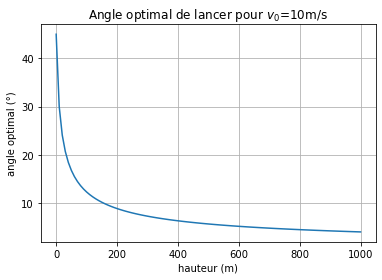

In [7]:
def opt_angle(g,v0,h):
    return np.arcsin(np.sqrt(1/(2*(1+g*h/v0**2))))


h = np.linspace(0,1000,101) # Set of different initial heights
opt = opt_angle(g,v0,h) # Array of optimal angle for a given h

plt.plot(h,np.degrees(opt))
plt.xlabel("hauteur (m)")
plt.ylabel("angle optimal (°)")
plt.title("Angle optimal de lancer pour $v_0$={}m/s".format(v0))
plt.grid()
plt.show()


On constate que plus l'altitude initiale est élevée, plus l'angle optimal de lancer tend vers 0, ce qui correspond à un lancer horizontal.
On peut le comprendre en réalisant que plus $h$ est grand, plus on se rapproche du sommet de la parabole décrivant notre trajectoire. Or, au sommet, la vitesse est horizontale.
On peut aussi dire que plus $h$ est élevé, moins on a besoin de donner une vitesse verticale, puisqu'on est déjà en altitude. Puisque le temps de chute sera "long", il faut réussir à avancer le plus loin possible dans la direction $x$ : toute la vitesse doit alors être attribuée à la composante horizontale, au lieu de la répartir à la fois verticalement et horizontalement.

En remplaçant l'expression précédente dans $x_{sol}$, on obtient alors :
$$
x_{max}=\frac{v_0}{g}\sqrt{v_0^2+2gh}
$$
On peut alors, pour un $v_0$ donné, tracer l'allure de $x_{max}(h)$.

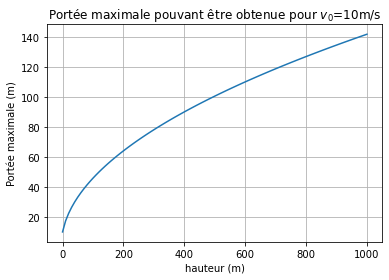

In [8]:
def func_xmax(g,v0,h,angle):
    return (v0/g)*np.sqrt(v0**2 + 2*g*h)

xmax = func_xmax(g,v0,h,opt) # Calculates xmax for a given height

plt.plot(h,xmax)
plt.xlabel("hauteur (m)")
plt.ylabel("Portée maximale (m)")
plt.title("Portée maximale pouvant être obtenue pour $v_0$={}m/s".format(v0))
plt.grid()
plt.show()

La portée maximale évolue donc en racine carrée. Si $h$ devient très grand devant $v_0$, alors l'expression devient simplement :
$$
x_{max}=\frac{v_0}{g}\sqrt{2gh}
$$

Il est surprenant de se rappeler que la loi de Torricelli, qui donne la vitesse d'écoulement issue d'une colonne de fluide hauteur $h$, est $v=\sqrt{2gh}$.